# Importing libraries and datasets

In [15]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [16]:
# Reading the training dataset  using Pandas
train = pd.read_csv("train.csv")
# Reading the test dataset using Pandas
test = pd.read_csv("test.csv")

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Target Variable

Y    422
N    192
Name: Loan_Status, dtype: int64


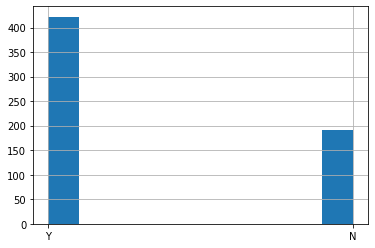

In [17]:
train['Loan_Status'].hist()
count= train['Loan_Status'].value_counts()
print(count)

# categorical variable analysis

Male      489
Female    112
Name: Gender, dtype: int64


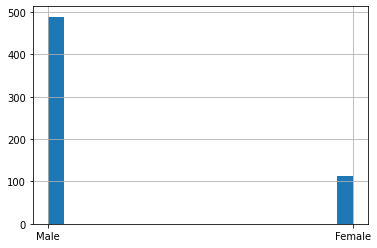

In [19]:
train['Gender'].hist(bins=20)
count=train['Gender'].value_counts()
print(count)

Yes    398
No     213
Name: Married, dtype: int64


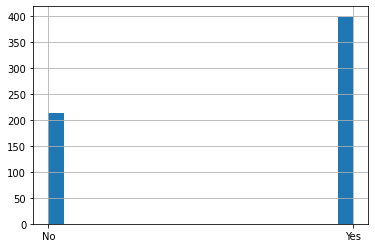

In [20]:
train['Married'].hist(bins=20)
count=train['Married'].value_counts()
print(count)

No     500
Yes     82
Name: Self_Employed, dtype: int64


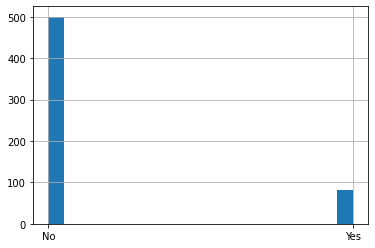

In [21]:
train['Self_Employed'].hist(bins=20)
count=train['Self_Employed'].value_counts()
print(count)

1.0    475
0.0     89
Name: Credit_History, dtype: int64


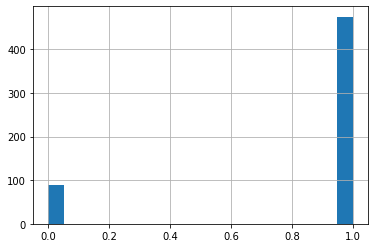

In [22]:
train['Credit_History'].hist(bins=20)
count=train['Credit_History'].value_counts()
print(count)

# Numerical variable 

<AxesSubplot:>

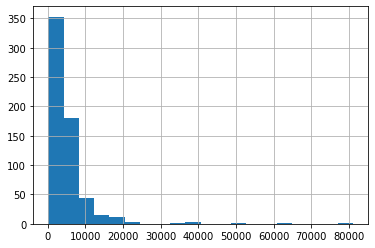

In [23]:
train['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

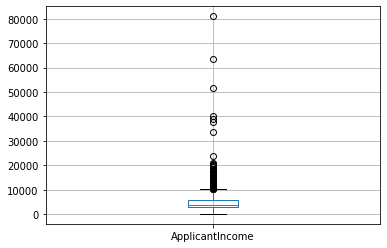

In [24]:
train.boxplot(column='ApplicantIncome')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

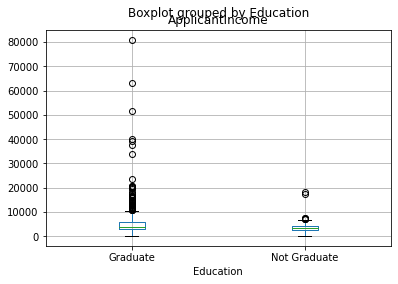

In [25]:
train.boxplot(column='ApplicantIncome', by = 'Education')

In [26]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']

<AxesSubplot:>

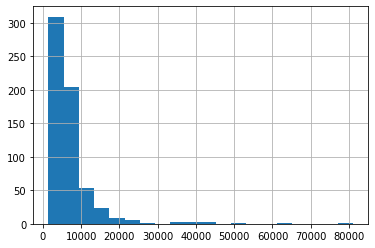

In [27]:
train['TotalIncome'].hist(bins=20)

<AxesSubplot:>

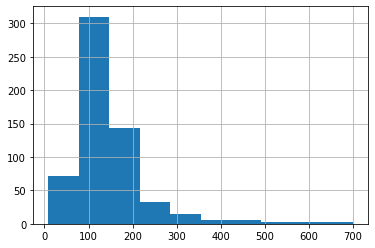

In [28]:
train['LoanAmount'].hist()

In [29]:
# perform log transformation of TotalIncome to make it closer to normal
train['LoanAmount_log']= np.log(train['LoanAmount'])

<AxesSubplot:>

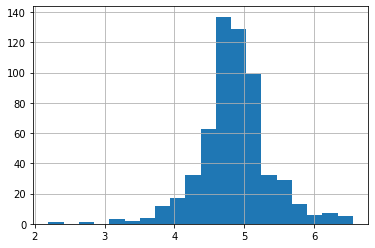

In [30]:
# Distribution of the TotalIncome_log
train['LoanAmount_log'].hist(bins=20)

# Checking & imputing missing values

In [31]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
LoanAmount_log       22
dtype: int64

In [32]:
import missingno as msno

<AxesSubplot:>

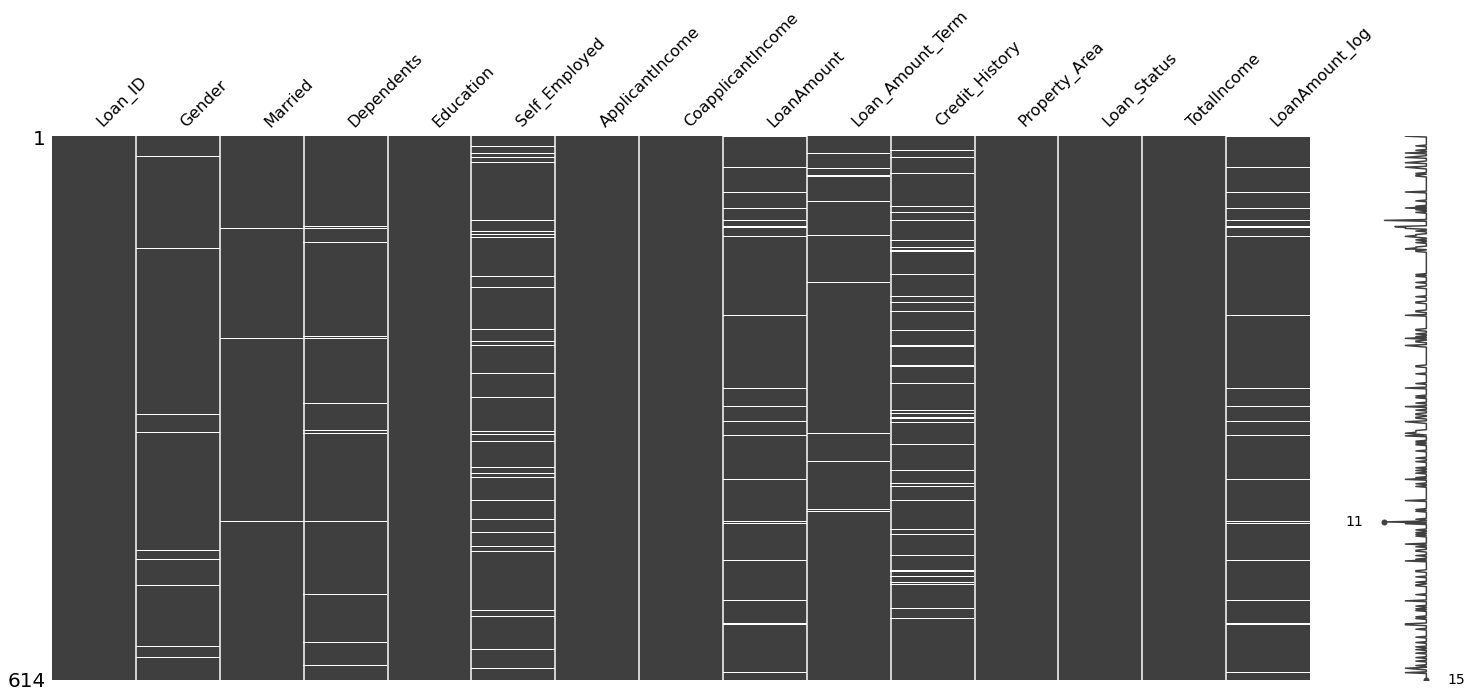

In [33]:
msno.matrix(train)

In [34]:
# Input missing values for Gender
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True) 
# Input missing values for Married
train['Married'].fillna(train['Married'].mode()[0],inplace=True) 
# Input missing values for Dependents
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True) 
# Input missing values for Credit_History
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
# Input missing values for Self_Employed
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
# Input missing values for Loan_Amount_Term
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train.LoanAmount= train.LoanAmount.fillna(train.LoanAmount.mean())
train.LoanAmount_log= train.LoanAmount_log.fillna(train.LoanAmount_log.mean())

In [35]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
LoanAmount_log       0
dtype: int64

<AxesSubplot:>

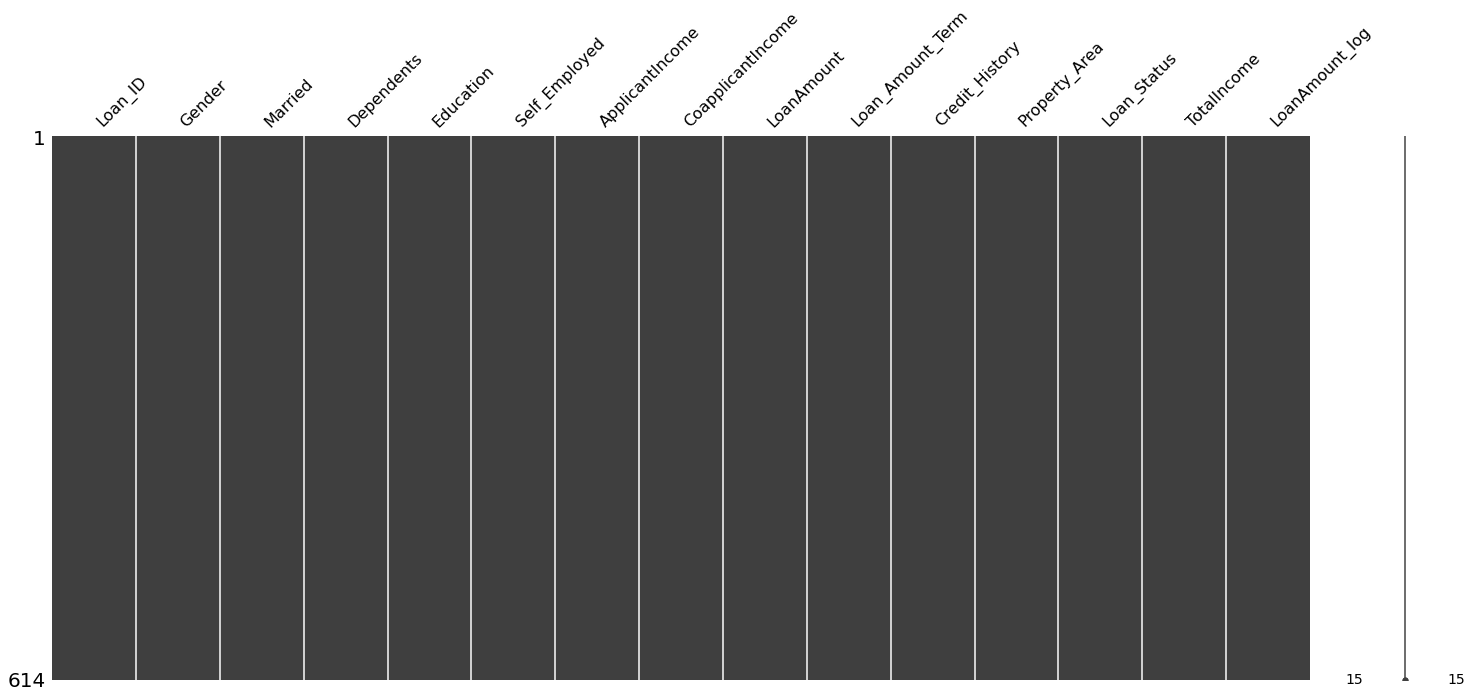

In [36]:
msno.matrix(train)

# Outlier treatment

<AxesSubplot:>

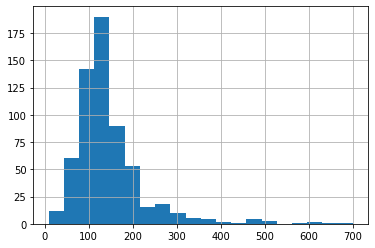

In [37]:
train['LoanAmount'].hist(bins=20)

In [38]:
# perform log transformation of TotalIncome to make it closer to normal
train['LoanAmount_log']= np.log(train['LoanAmount'])

<AxesSubplot:>

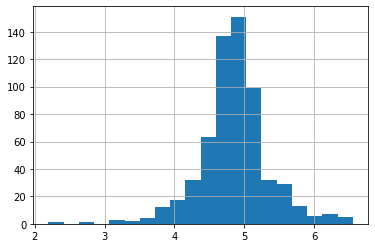

In [39]:
train['LoanAmount_log'].hist(bins=20)

# Splitting datasets

In [40]:
X=train.iloc[:,np.r_[1:5,9:11,13:15]].values
Y=train.iloc[:,12].values

In [41]:
X

array([['Male', 'No', '0', ..., 1.0, 5849.0, 4.986425672954842],
       ['Male', 'Yes', '1', ..., 1.0, 6091.0, 4.852030263919617],
       ['Male', 'Yes', '0', ..., 1.0, 3000.0, 4.189654742026425],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 8312.0, 5.53338948872752],
       ['Male', 'Yes', '2', ..., 1.0, 7583.0, 5.231108616854587],
       ['Female', 'No', '0', ..., 0.0, 4583.0, 4.890349128221754]],
      dtype=object)

In [42]:
Y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [43]:
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train , Y_test= train_test_split(X,Y, test_size=0.2, random_state=0)

In [44]:
X_train

array([['Male', 'Yes', '0', ..., 1.0, 5858.0, 4.875197323201151],
       ['Male', 'No', '1', ..., 1.0, 11250.0, 5.278114659230517],
       ['Male', 'Yes', '0', ..., 0.0, 5681.0, 5.003946305945459],
       ...,
       ['Male', 'Yes', '3+', ..., 1.0, 8334.0, 5.298317366548036],
       ['Male', 'Yes', '0', ..., 1.0, 6033.0, 5.075173815233827],
       ['Female', 'Yes', '0', ..., 1.0, 6486.0, 5.204006687076795]],
      dtype=object)

In [45]:
X_test

array([['Male', 'No', '0', 'Graduate', 360.0, 1.0, 7085.0,
        4.430816798843313],
       ['Female', 'No', '0', 'Graduate', 360.0, 1.0, 4230.0,
        4.718498871295094],
       ['Male', 'Yes', '0', 'Graduate', 360.0, 1.0, 10039.0,
        5.780743515792329],
       ['Male', 'Yes', '0', 'Graduate', 360.0, 1.0, 6784.0,
        4.700480365792417],
       ['Male', 'Yes', '2', 'Graduate', 360.0, 1.0, 3875.0,
        4.574710978503383],
       ['Male', 'Yes', '0', 'Not Graduate', 180.0, 0.0, 6058.0,
        5.10594547390058],
       ['Male', 'Yes', '3+', 'Graduate', 180.0, 1.0, 6417.0,
        5.056245805348308],
       ['Male', 'No', '0', 'Graduate', 360.0, 1.0, 12876.0,
        6.003887067106539],
       ['Male', 'No', '0', 'Graduate', 360.0, 0.0, 5124.0,
        4.820281565605037],
       ['Male', 'Yes', '0', 'Graduate', 360.0, 1.0, 5233.0,
        4.852030263919617],
       ['Female', 'No', '0', 'Graduate', 360.0, 1.0, 2917.0,
        4.430816798843313],
       ['Male', 'Yes', '1',

In [47]:
Y_train

array(['Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N

In [46]:
Y_test

array(['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y'], dtype=object)

In [48]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [49]:
for i in range(0, 5):
    X_train[:,i]= labelencoder_X.fit_transform(X_train[:,i])

In [50]:
X_train[:,7]= labelencoder_X.fit_transform(X_train[:,7])

In [51]:
X_train

array([[1, 1, 0, ..., 1.0, 5858.0, 80],
       [1, 0, 1, ..., 1.0, 11250.0, 131],
       [1, 1, 0, ..., 0.0, 5681.0, 98],
       ...,
       [1, 1, 3, ..., 1.0, 8334.0, 132],
       [1, 1, 0, ..., 1.0, 6033.0, 108],
       [0, 1, 0, ..., 1.0, 6486.0, 122]], dtype=object)

In [52]:
labelencoder_Y= LabelEncoder()
Y_train= labelencoder_Y.fit_transform(Y_train)

In [53]:
Y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [54]:
for i in range(0, 5):
    X_test[:,i]= labelencoder_X.fit_transform(X_test[:,i])

In [55]:
X_test[:,7]= labelencoder_X.fit_transform(X_test[:,7])

In [58]:
labelencoder_Y= LabelEncoder()
Y_test= labelencoder_Y.fit_transform(Y_test)

In [59]:
X_test

array([[1, 0, 0, 0, 5, 1.0, 7085.0, 10],
       [0, 0, 0, 0, 5, 1.0, 4230.0, 24],
       [1, 1, 0, 0, 5, 1.0, 10039.0, 71],
       [1, 1, 0, 0, 5, 1.0, 6784.0, 22],
       [1, 1, 2, 0, 5, 1.0, 3875.0, 16],
       [1, 1, 0, 1, 3, 0.0, 6058.0, 48],
       [1, 1, 3, 0, 3, 1.0, 6417.0, 45],
       [1, 0, 0, 0, 5, 1.0, 12876.0, 72],
       [1, 0, 0, 0, 5, 0.0, 5124.0, 30],
       [1, 1, 0, 0, 5, 1.0, 5233.0, 33],
       [0, 0, 0, 0, 5, 1.0, 2917.0, 10],
       [1, 1, 1, 0, 5, 1.0, 2895.0, 14],
       [0, 0, 0, 0, 5, 1.0, 8333.0, 68],
       [1, 1, 2, 0, 5, 1.0, 8667.0, 65],
       [1, 1, 0, 0, 5, 1.0, 14880.0, 15],
       [1, 1, 1, 0, 5, 1.0, 3875.0, 3],
       [1, 0, 1, 1, 5, 1.0, 4311.0, 58],
       [1, 0, 0, 1, 5, 1.0, 3946.0, 35],
       [0, 0, 0, 0, 5, 1.0, 2500.0, 13],
       [1, 1, 0, 1, 5, 0.0, 4787.0, 55],
       [0, 1, 0, 0, 5, 0.0, 6085.0, 28],
       [1, 1, 0, 0, 5, 1.0, 4765.0, 42],
       [1, 1, 2, 0, 5, 1.0, 7550.0, 21],
       [1, 1, 2, 0, 5, 1.0, 11500.0, 48],
       [1, 1,

In [60]:
Y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

# Model building

In [61]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

##Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
DTClassifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [68]:
Y_pred_DT= DTClassifier.predict(X_test)
print(Y_pred_DT)
print('The accuracy of decision tree is:', metrics.accuracy_score(Y_pred_DT,Y_test))

[0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0
 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0
 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 0 0 0 1 1 0 0 0]
The accuracy of decision tree is: 0.6991869918699187


In [ ]:
##Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
LogClassifier= LogisticRegression(random_state=0)
LogClassifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [69]:
Y_pred_LR= LogClassifier.predict(X_test)
print(Y_pred_LR)
print('The accuracy of Logistic Regression is:', metrics.accuracy_score(Y_pred_LR,Y_test))

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
The accuracy of Logistic Regression is: 0.8292682926829268


In [ ]:
##Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
randomC= RandomForestClassifier(n_estimators=100)
randomC.fit(X_train,Y_train)

RandomForestClassifier()

In [70]:
Y_pred_RF= randomC.predict(X_test)
print(Y_pred_RF)
print('The accuracy of Random Forest is:', metrics.accuracy_score(Y_pred_RF,Y_test))

[1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1
 0 0 1 0 0 1 1 1 1 0 0 0]
The accuracy of Random Forest is: 0.7398373983739838


In [ ]:
##Support Vector Machine

In [71]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state = 1)
svm.fit(X_train,Y_train)

SVC(random_state=1)

In [72]:
Y_pred_svm = svm.predict(X_test)
print(Y_pred_svm)
print('The accuracy of svm is:', metrics.accuracy_score(Y_pred_svm,Y_test))

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
The accuracy of svm is: 0.8292682926829268


In [73]:
print(metrics.confusion_matrix(Y_test, Y_pred))

[[21 12]
 [20 70]]


In [74]:
from sklearn.metrics import r2_score

In [75]:
r2 = r2_score(Y_test, Y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is -0.3252525252525251


# Imputing test dataset

In [76]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [77]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [78]:
test.LoanAmount=test.LoanAmount.fillna(test.LoanAmount.mean())

In [79]:
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [80]:
test['TotalIncome']= test['ApplicantIncome']+test['CoapplicantIncome']
test['TotalIncome_log']= np.log(test['TotalIncome'])

# Splitting test set

In [81]:
Test= test.iloc[:,np.r_[1:5,9:11,13:15]].values

In [82]:
for i in range(0,5):
    Test[:,i]=labelencoder_X.fit_transform(Test[:,i])

In [83]:
Test[:,7]= labelencoder_X.fit_transform(Test[:,7])

In [84]:
Test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [85]:
Test= ss.fit_transform(Test)

# Prediction by different models

In [90]:
pred_DT= DTClassifier.predict(Test)
print(np.count_nonzero(pred_DT))
print(pred_DT)

221
[0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1
 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0
 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1
 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0
 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1]


In [91]:
pred_LR= LogClassifier.predict(Test)
print(np.count_nonzero(pred_LR))
print(pred_LR)

308
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [92]:
pred_RF= randomC.predict(Test)
print(np.count_nonzero(pred_RF))
print(pred_RF)

279
[1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1]


In [93]:
pred_svm= svm.predict(Test)
print(np.count_nonzero(pred_svm))
print(pred_svm)

309
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
